In [71]:
import os
import scipy.stats as stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import pytz
from sklearn.utils import resample
%matplotlib inline
from matplotlib.ticker import NullFormatter

from sklearn import metrics
import Data_Processor as DP
import importlib
importlib.reload(DP)

Root = 'C:/Illisarvik/'

Flux_Path = Root+'Flux_Results/eddypro_Illisarvik_full_output_2017-03-08T142621.csv'
Met_Path = Root+'SlowMet/CR1000_Table1.DAT'
Soil_Path = Root+'SoilSensors/SoilData.txt'

Comp = DP.Compile(Flux_Path,Met_Path,Soil_Path)


Comp.Rain_Check([0,0])

Comp.Wind_Bins(30)
    
Comp.QC_Check(2)
Comp.Spike_Removal(z_thresh=5.5)
Comp.StorageCorrection()
Comp.Wind_Filter(30)
# Comp.ustar_Bins(15,{'Var':'PPFD_Avg','Thresh':10},{'Var':'ch4_flux','Plot':True},
#                 {'Repetitions':100,'n_samples':10000})
Comp.Ustar_Drop()

Data = Comp.Data.copy()
Data['Temp'] = (Data['Temp1']+Data['Temp2'])/2
Data['VWC'] = (Data['VWC1']+Data['VWC2'])/2
Data.to_csv(Root+'FilteredData' +str(dt.datetime.now()).split(' ')[0]+'.csv')

# We'll Incoroporate the chamber data here!!!

In [101]:
CD=pd.read_csv(Root+'ChamberData.csv',header=0)
# print(CD.Date)
# print(CD.to_datetime(['Date']))
# CD = CD.set_index([pd.DatetimeIndex([['Date','Start Time']]),'Site','Collar'])

# print(CD['VWC'])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


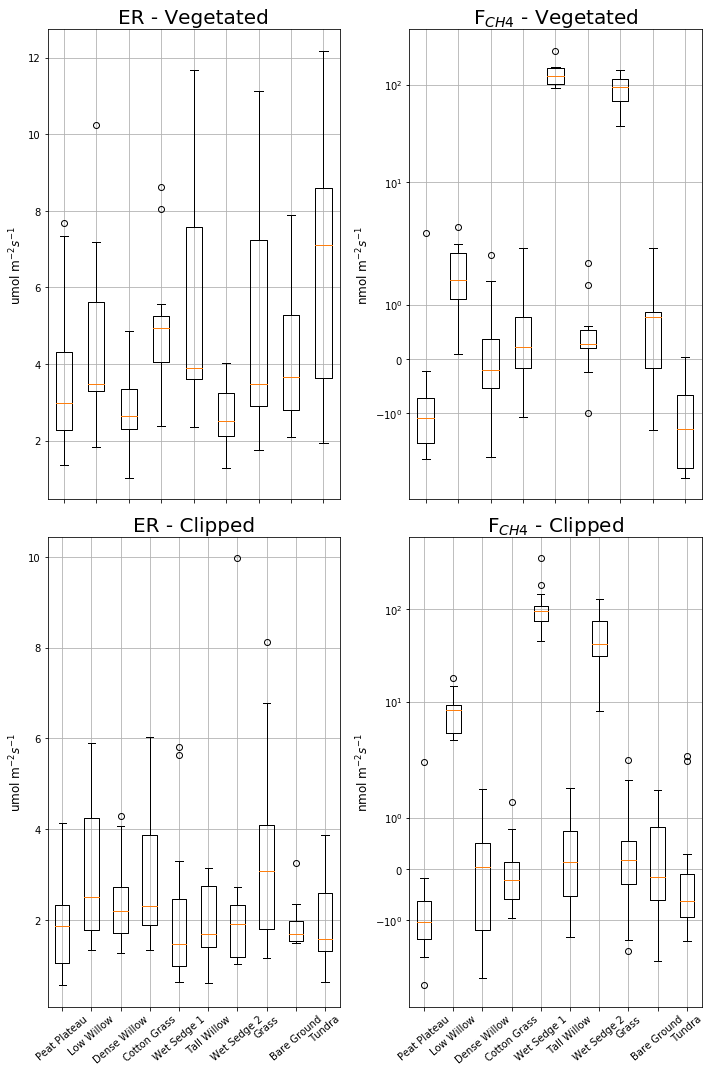

KeyError: 'Site'

In [76]:

CD['Site2'] = CD['Site']
CD.set_index(['Site', 'Collar'], inplace=True)
Veg = CD.xs('veg',level='Collar')
unVeg = CD.xs('unveg',level='Collar')

MasterNames={'T12' : 'Tundra',
'B6' : 'Peat Plateau',
'C3' : 'Low Willow',
'E2' : 'Dense Willow',
'E7' : 'Cotton Grass',
'F3' : 'Wet Sedge 1',
'F8' : 'Tall Willow',
'H6' : 'Wet Sedge 2',
'H7' : 'Grass',
'J6' : 'Bare Ground'}

Names={'T12' : 'Tundra',
'B6' : 'Peat Plateau',
'C3' : 'Low Willow',
'E2' : 'Dense Willow',
'E7' : 'Cotton Grass',
'F3' : 'Wet Sedge 1',
'F8' : 'Tall Willow',
'H6' : 'Wet Sedge 2',
'H7' : 'Grass',
'J6' : 'Bare Ground'}

def PlotFunc(ax,Data,flux,title,unit,Xl = True,logy=False):
    BP = []
    LB = []
    for i,site in enumerate(Data.index.unique()):
        BP.append(Data[flux][site])
        LB.append(Names[site])
    ax.boxplot(BP,labels=LB)
    if Xl == False:
        ax.xaxis.set_major_formatter(NullFormatter())
#         ax.get_xaxis().set_visible(False)
    else:
        plt.sca(ax)
        plt.xticks(rotation=40,fontsize=10)
    if logy == True:
        ax.set_yscale('symlog')
    ax.grid()
    ax.set_title(title,fontsize = 20)
    ax.set_ylabel(unit,fontsize=12)
    
fig,ax = plt.subplots(2,2,figsize=(10,15))

PlotFunc(ax[0,0],Veg,'CO2 Flux (umol/m2/s)','ER - Vegetated','umol m$^{-2} s^{-1}$',Xl=False)
PlotFunc(ax[0,1],Veg,'CH4 Flux  (nmol/m2/s)','F$_{CH4}$ - Vegetated','nmol m$^{-2} s^{-1}$',Xl=False,logy=True)
PlotFunc(ax[1,0],unVeg,'CO2 Flux (umol/m2/s)','ER - Clipped','umol m$^{-2} s^{-1}$')
PlotFunc(ax[1,1],unVeg,'CH4 Flux  (nmol/m2/s)','F$_{CH4}$ - Clipped','nmol m$^{-2} s^{-1}$',logy=True)

plt.tight_layout()
plt.savefig('C:/Users/wesle/CompsProj/ChamberData.png',dpi=500)

plt.show()

# print(CD.head())
Veg.set_index(['Site','Date'])
print(Veg.head())
